In [2]:
#N1

import numpy as np
a = np.random.random((10, 3))
a[np.arange(10),np.absolute(a-0.5).argmin(axis=1)]

array([0.74616046, 0.45536209, 0.42096159, 0.48227566, 0.47078252,
       0.5076001 , 0.52415114, 0.64836492, 0.25770557, 0.33032437])

In [12]:
#N2


import numpy as np
a = np.random.random((6, 6))
np.array([np.sum(a[i])/np.min(a[np.arange(6),i]) for i in range(6)])

array([ 23.89102728,  52.77382913,   4.60386796, 177.61964758,
        23.39967286,  27.38715246])

In [33]:
#N3 


import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
np.amax(np.array([x[i] for i in range(1,8) if x[i-1]==0]))

5

In [43]:
#N4


import numpy as np
x = np.ones(10)
a = np.array([0, 1, 2, 3, 5, 5, 5, 8])
np.array([a==j for j in range (10)]).sum(axis=1)+x

# for i in range(len(a)):
#     b = a[i]
#     x[b]=x[b] + 1
# print(x)

array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

In [7]:
#N5

n=4
a = np.arange(16).reshape(n,n)
d = {3-j: np.diagonal(a[:, ::-1], j).tolist() for j in range(3, -4, -1) } 
print(d)

# d={a: None for a in range(n*2-1)}
# b=[]
# for i in range(n):
#     for j in range(i+1):
#         b.append(a[j,i-j])
#     d[i]=b
#     b=[]
# for i in range(n-1):
#     for j in range(i+1):
#         b.append(a[n-i+j-1,n-j-1])
#     d[n*2-2-i]=b
#     b=[]
# print(d)

{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


In [42]:
#N6


import numpy as np 
from scipy.cluster.vq import kmeans
data = np.genfromtxt('geysers.csv', delimiter=',', skip_header=1)

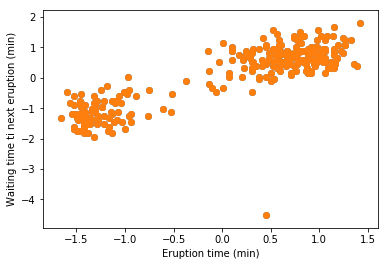

In [45]:
plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')

plt.scatter(*data.T)
plt.show()
data = (data - data.mean(axis=0)) / data.std(axis=0)

centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))

In [46]:

def get_labels(pts, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def kmeans(obs, k, iter=20, thresh=1e-05):
    centroids = np.random.random((k, obs.shape[1]))
    labels = get_labels(obs, centroids)
    norm = norma(obs, centroids, labels)
    minnm = norm
    newcen = centroids
        
        
    for i in range(iter):
        prevnm = norm
        centroids = np.array([obs[labels == i].mean(axis=0) for i in range(k)])
        labels = get_labels(obs, centroids)
        norm = norma(obs, centroids, labels)       
        if norm < minnm:
            newcen = centroids
            minnm = norm
   
        if abs(norm - prevnm) < thresh:
            break
            
    return newcen

def norma(obs, centroids, labels):
    ans = 0
    for i in range(centroids.shape[0]):
        ans+= abs(np.linalg.norm(obs[i==labels] - centroids[i], axis=1).sum())
    return ans

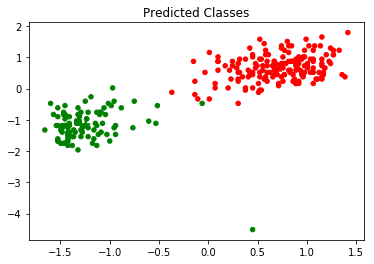

In [47]:
centroids = kmeans(data, 2)
labels = get_labels(data, centroids)
plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()
#print(centroids)